# Lecture 9: Root finding

## Bisection method
Starting from *bracket* where $\operatorname{sign}(f(a)) \neq \operatorname{sign}(f(b))$,
we successively halve the interval that must contain the root.

In [1]:
using LinearAlgebra

using PyPlot
PyPlot.svg(true);

In [2]:
function bisect(f, x_a, x_b; N=10)
    """ Implement the bisection method for finding a
    zero of f(x). We must have sign(f(x_a)) != sign(f(x_b))
    """
    if sign(f(x_a)) == sign(f(x_b))
        println("signs at endpoints must differ")
        return
    end
    
    left, right = x_a, x_b
    mid = 0.0
    
    for i=1:N
        mid = 0.5*(left + right)
        if sign(f(left)) == sign(f(mid))
            left = mid
        else
            right = mid
        end
    end
    
    return mid
end

bisect (generic function with 1 method)

In [18]:
f(x) = tanh(x - 5.0)

bisect(f, 3.0, 8.0; N=23)

4.9999998807907104

In [19]:
# convergence analysis
Ns = collect(1:20)

# roughly one digit per iteration
approximations = [bisect(f, 3.0, 8.0; N=N) for N in Ns]

20-element Array{Float64,1}:
 5.5               
 4.25              
 4.875             
 5.1875            
 5.03125           
 4.953125          
 4.9921875         
 5.01171875        
 5.001953125       
 4.9970703125      
 4.99951171875     
 5.000732421875    
 5.0001220703125   
 4.99981689453125  
 4.999969482421875 
 5.0000457763671875
 5.000007629394531 
 4.999988555908203 
 4.999998092651367 
 5.000002861022949 

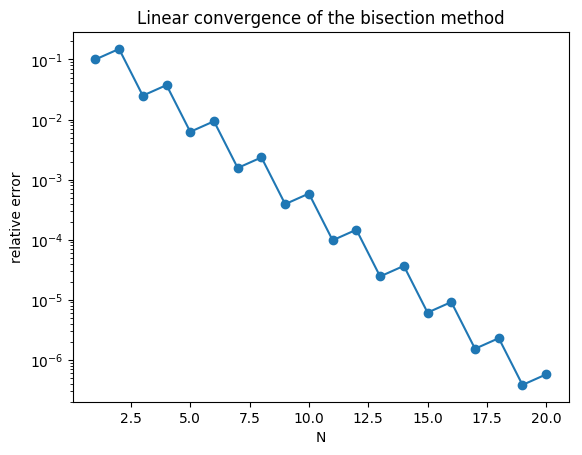

PyObject Text(0.5, 1.0, 'Linear convergence of the bisection method')

In [20]:
figure()

semilogy(Ns, abs.(approximations .- 5.0)/5.0, "-o")
xlabel("N")
ylabel("relative error")
title("Linear convergence of the bisection method")

## Secant method
Instead of simply halving the interval and taking the half as the new
approximation of the zero, 
we compute the line through the two bracket points (the secant) and
take the point where that line crosses the $x$ axis as our new estimate
for the zero:

$$
x_{n+1} = x_n - \frac{x_n - x_{n-1}}{f(x_n) - f(x_{n-1})} f(x_n).
$$

In [21]:
function secant(f, x_a, x_b; N=10)
    """ Implement the secant method for finding a
    zero of f(x). We must have sign(f(x_a)) != sign(f(x_b))
    """
    if sign(f(x_a)) == sign(f(x_b))
        println("signs at endpoints must differ")
        return
    end
    
    x_nm1 = x_b
    x_n = x_b - (x_b - x_a)/(f(x_b) - f(x_a)) * f(x_b) 
    
    for i=1:N
        # compute new value
        x_new = x_n - (x_n - x_nm1)/(f(x_n) - f(x_nm1)) * f(x_n)
        
        # update stored values
        x_nm1 = x_n
        x_n = x_new
    end
    
    return x_n
end

secant (generic function with 1 method)

In [26]:
f(x) = tanh(x - 5.0)

secant(f, 3.0, 8.0; N=7)

5.0

In [27]:
# convergence analysis
Ns = collect(1:10)

# roughly one digit per iteration
approximations = [secant(f, 3.0, 8.0; N=N) for N in Ns]

10-element Array{Float64,1}:
   3.5245175833076043
   4.834399435595375 
   5.1262547616621   
   4.999728467605255 
   5.000001438119169 
   4.9999999999999645
   5.0               
   5.0               
 NaN                 
 NaN                 

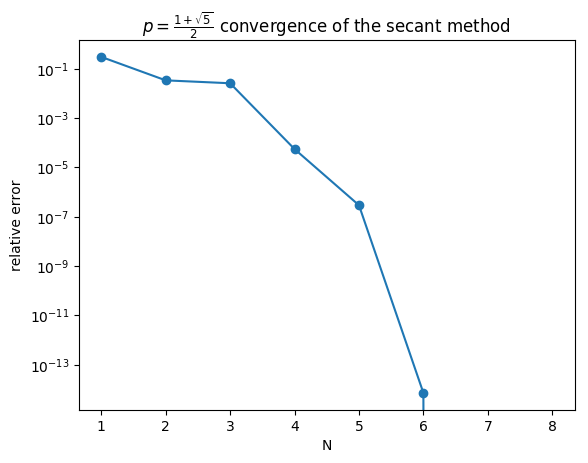

PyObject Text(0.5, 1.0, '$p=\\frac{1+\\sqrt{5}}{2}$ convergence of the secant method')

In [28]:
figure()

semilogy(Ns, abs.(approximations .- 5.0)/5.0, "-o")
xlabel("N")
ylabel("relative error")
title(L"$p=\frac{1+\sqrt{5}}{2}$ convergence of the secant method")

## Newton-Raphson (or Newton) method

The secant method looks like it contains a finite difference approximation of a
derivative. If $f(x)$ is differentiable and we are close to the root, we
can define Newton's method as

$$
x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)},
$$

where we need to know or be able to approximate $f'(x)$.

In [29]:
function newton_raphson(f, f_prime, x0; N=10)
    """ Implement Newton's method for finding a
    zero of f(x) from the starting guess x0.
    """
    x = x0
    for i=1:N
        x = x .- f(x)./f_prime(x)
    end
    
    return x
end

newton_raphson (generic function with 1 method)

In [30]:
f(x) = tanh(x - 5.0)
f_prime(x) = 1/cosh(x - 5.0)^2

newton_raphson(f, f_prime, 4.0, N=6)

5.0

In [31]:
# convergence analysis
Ns = collect(1:8)

# roughly one digit per iteration
approximations = [newton_raphson(f, f_prime, 4.0, N=N) for N in Ns]

8-element Array{Float64,1}:
 5.8134302039235095
 4.590597683416615 
 5.047304916455616 
 4.999929397196356 
 5.0000000000002345
 5.0               
 5.0               
 5.0               

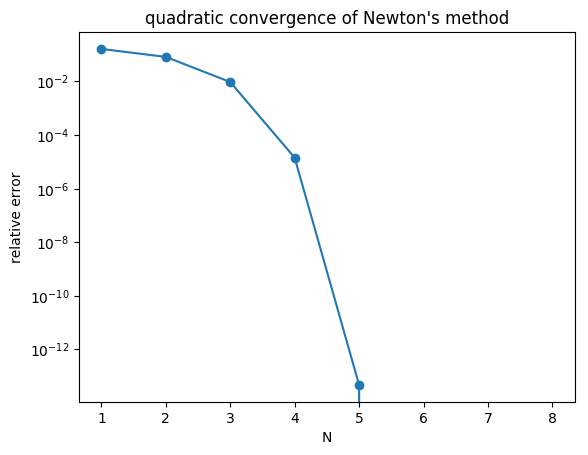

PyObject Text(0.5, 1.0, "quadratic convergence of Newton's method")

In [32]:
figure()

semilogy(Ns, abs.(approximations .- 5.0)/5.0, "-o")
xlabel("N")
ylabel("relative error")
title("quadratic convergence of Newton's method")

In [35]:
# Newton's method for double roots

f(x) = (x - 5.0)^2
f_prime(x) = 2(x - 5.0)

newton_raphson(f, f_prime, 3.0, N=20)

4.999998092651367

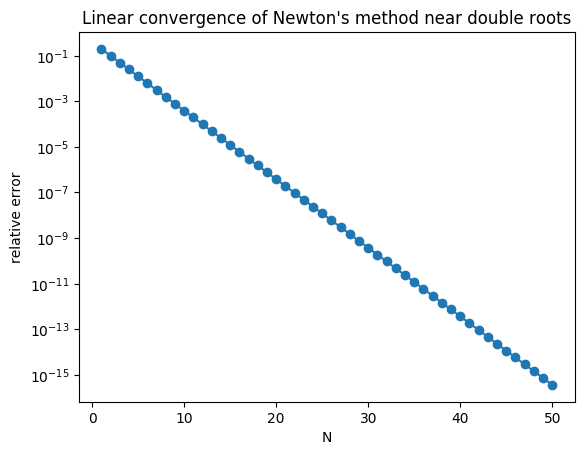

PyObject Text(0.5, 1.0, "Linear convergence of Newton's method near double roots")

In [36]:
# convergence analysis
Ns = collect(1:50)

# roughly one digit per iteration
approximations = [newton_raphson(f, f_prime, 3.0, N=N) for N in Ns]

figure()

semilogy(Ns, abs.(approximations .- 5.0)/5.0, "-o")
xlabel("N")
ylabel("relative error")
title("Linear convergence of Newton's method near double roots")

## Global behavior of Newton's method

If we start close to a root then Newton's method is extremely powerful.
If, however, our starting guess $x_0$ is bad then it can fail completely.

In [38]:
f(x) = tanh(x - 5.0)
f_prime(x) = 1/cosh(x - 5.0)^2

# result is completely wrong!
newton_raphson(f, f_prime, 0.0, N=2)

-Inf

In [44]:
# Let's apply Newton's method to a function with no real roots
f(x) = 1 + x^2
f_prime(x) = 2x

newton_raphson(f, f_prime, 0.1, N=6)

-10.42743738645265

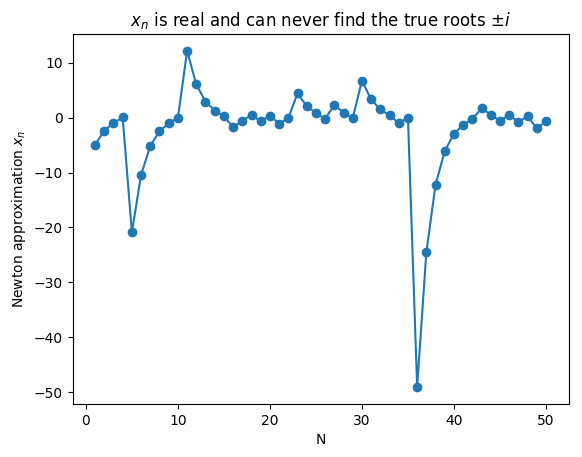

PyObject Text(0.5, 1.0, '$x_n$ is real and can never find the true roots $\\pm i$')

In [45]:
Ns = 1:50

approximations = [newton_raphson(f, f_prime, 0.1, N=N) for N in Ns]

figure()

plot(Ns, approximations, "-o")
xlabel("N")
ylabel(L"Newton approximation $x_n$")
title(L"$x_n$ is real and can never find the true roots $\pm i$")

In [47]:
# try a *complex* starting value instead
f(x) = 1 .+ x.^2
f_prime(x) = 2x

# convergence to the correct root!
newton_raphson(f, f_prime, 0.1im, N=8)

0.0 + 1.0im

In [48]:
function newton_fractal(f, f_prime, n; N=20)
    Res = LinRange(-2, 2, n)
    Ims = 1im*LinRange(-2, 2, n)
    
    # set up matrix of initial conditions
    x0 = zeros(Complex, n, n)
    for (i, re) in enumerate(Res)
        for (j, im) in enumerate(Ims)
            x0[j,i] = re + im
        end
    end
    
    # return complex angle of solution
    return angle.(newton_raphson(f, f_prime, x0; N=N))
end

newton_fractal (generic function with 1 method)

In [49]:
f(x) = 1 .+ x.^2
f_prime(x) = 2x

converged_to = newton_fractal(f, f_prime, 512);

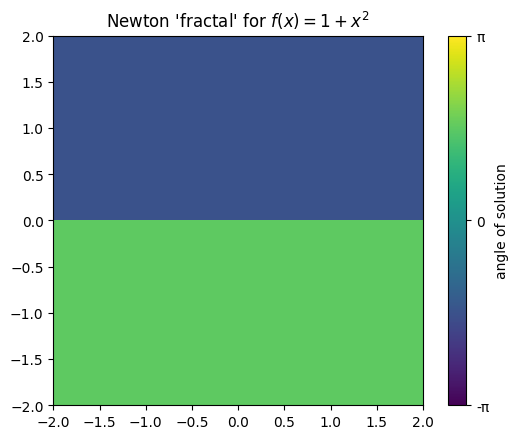

┌ Warning: `getindex(o::PyObject, s::Symbol)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o.s` instead of `o[:s]`.
│   caller = top-level scope at In[50]:4
└ @ Core In[50]:4
┌ Warning: `getindex(o::PyObject, s::Symbol)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o.s` instead of `o[:s]`.
│   caller = top-level scope at In[50]:4
└ @ Core In[50]:4


PyObject Text(0.5, 1.0, "Newton 'fractal' for $f(x) =  1+x^2$")

In [50]:
figure()
imshow(converged_to, vmin=-π, vmax=π, extent=[-2, 2, -2, 2])
cb = colorbar(ticks=[-π, 0, π], label="angle of solution")
cb[:ax][:set_yticklabels](["-π", "0", "π"])

title(L"Newton 'fractal' for $f(x) =  1+x^2$")

In [51]:
f(x) = 1 .+ x.^3
f_prime(x) = 3x.^2

converged_to = newton_fractal(f, f_prime, 1024);

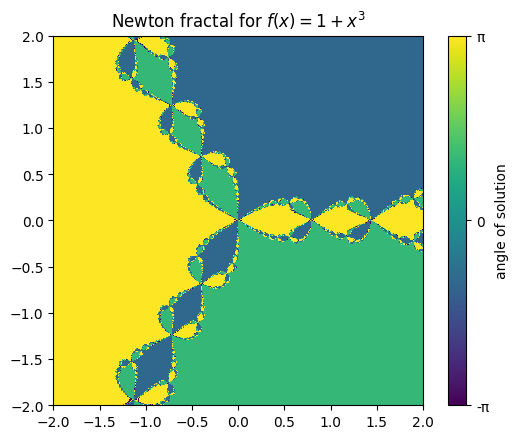

┌ Warning: `getindex(o::PyObject, s::Symbol)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o.s` instead of `o[:s]`.
│   caller = top-level scope at In[52]:4
└ @ Core In[52]:4
┌ Warning: `getindex(o::PyObject, s::Symbol)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o.s` instead of `o[:s]`.
│   caller = top-level scope at In[52]:4
└ @ Core In[52]:4


PyObject Text(0.5, 1.0, 'Newton fractal for $f(x) =  1+x^3$')

In [52]:
figure()
imshow(converged_to, vmin=-π, vmax=π, extent=[-2, 2, -2, 2])
cb = colorbar(ticks=[-π, 0, π], label="angle of solution")
cb[:ax][:set_yticklabels](["-π", "0", "π"])

title(L"Newton fractal for $f(x) =  1+x^3$")

In [53]:
f(x) = 1 .+ x.^4
f_prime(x) = 4x.^3

converged_to = newton_fractal(f, f_prime, 1024);

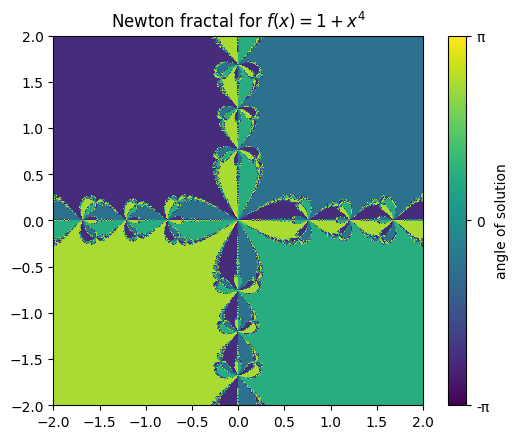

┌ Warning: `getindex(o::PyObject, s::Symbol)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o.s` instead of `o[:s]`.
│   caller = top-level scope at In[54]:4
└ @ Core In[54]:4
┌ Warning: `getindex(o::PyObject, s::Symbol)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o.s` instead of `o[:s]`.
│   caller = top-level scope at In[54]:4
└ @ Core In[54]:4


PyObject Text(0.5, 1.0, 'Newton fractal for $f(x) =  1+x^4$')

In [54]:
figure()
imshow(converged_to, vmin=-π, vmax=π, extent=[-2, 2, -2, 2])
cb = colorbar(ticks=[-π, 0, π], label="angle of solution")
cb[:ax][:set_yticklabels](["-π", "0", "π"])

title(L"Newton fractal for $f(x) =  1+x^4$")

## Newton's method in higher dimensions

In higher dimensions, the Newton iteration is defined as
$$
\mathbf{x}_{n+1} = \mathbf{x} - J(\mathbf{x}_n)^{-1} \mathbf{f}(\mathbf{x}_n),
$$

where $J$ is the Jacobian of $\mathbf{f}$.

In [55]:
function newton_nd(f, J, x0; N=10)
    x = x0
    for i=1:N
        # backslash operator solves linear system
        x = x .- (J(x) \ f(x))
    end
    
    return x
end

newton_nd (generic function with 1 method)

In [56]:
# function
f(x) = [x[1]^2 - cos(x[1]*x[2]); exp(x[1]*x[2]) + x[2]]

# Jacobian
J(x) = [
    (2x[1] + x[2]*sin(x[1]*x[2]))    (x[1]*sin(x[1]*x[2]))
    (x[2]*exp(x[1]*x[2]))            (x[1]*exp(x[1]*x[2]) + 1)
]

J (generic function with 1 method)

In [60]:
x0 = [1.0; 1.5]
x_N = newton_nd(f, J, x0; N=6)

println("x_N: \t\t\t", x_N)
println("residual ||f(x_N)||:\t", norm(f(x_N)))

x_N: 			[0.926175, -0.582852]
residual ||f(x_N)||:	0.0


## When does the secant method fail?

The secant method can fail if the function is "wiggly" on the interval considered,
specifically if it is differentiable and $f'(x)=0$ somewhere

In [96]:
# example where the secant method fails
f(x) = sin(10x) + x

-0.8030312477053716

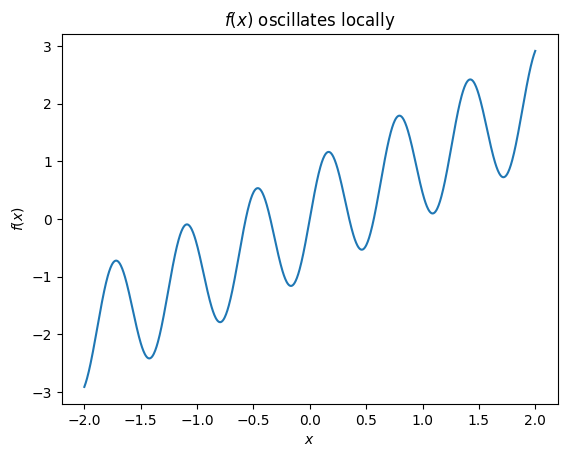

PyObject Text(0.5, 1.0, '$f(x)$ oscillates locally')

In [107]:
figure()
x = LinRange(-2, 2, 1000)
plot(x, f.(x))

xlabel(L"x")
ylabel(L"f(x)")
title(L"$f(x)$ oscillates locally")

In [129]:
# initial bracket is slightly asymmetric, the secant method gets stuck due to local
# oscillations of f(x)

secant(f, -1.0, 1.1; N=50)

-0.5716962677290586

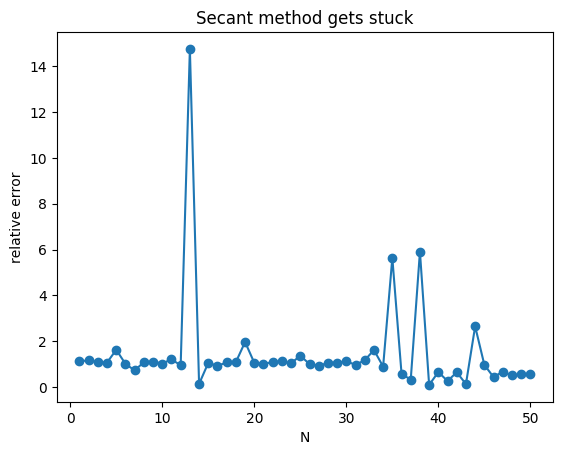

PyObject Text(0.5, 1.0, 'Secant method gets stuck')

In [117]:
# convergence analysis
Ns = collect(1:50)

# roughly one digit per iteration
approximations = [secant(f, -1.0, 1.1; N=N) for N in Ns]

figure()

plot(Ns, abs.(approximations), "-o")
xlabel("N")
ylabel("relative error")
title("Secant method gets stuck")

## The regula falsi/method of false position

This is a combination of the secant and bisection method.
It uses the secant iteration

$$
x_{n+1} = x_n - \frac{x_n - x_{n-1}}{f(x_n) - f(x_{n-1})} f(x_n),
$$

but makes sure that $x_{n+1}, x_n$ always bracket a zero by checking signs
like the bisection method.
The regula falsi always converges, albeit at a slower rate than the secant method.

In [112]:
function regula_falsi(f, x_a, x_b; N=10)
    """ Implement the regula falsi for finding a
    zero of f(x). We must have sign(f(x_a)) != sign(f(x_b))
    """
    if sign(f(x_a)) == sign(f(x_b))
        println("signs at endpoints must differ")
        return
    end
    
    x_nm1 = x_b
    x_n = x_b - (x_b - x_a)/(f(x_b) - f(x_a)) * f(x_b) 
    
    for i=1:N
        # compute new value
        x_new = x_n - (x_n - x_nm1)/(f(x_n) - f(x_nm1)) * f(x_n)
        
        
        # check signs to ensure convergence
        if sign(f(x_new)) != sign(f(x_n))
            x_nm1 = x_n
        end
            
        x_n = x_new
    end
    
    return x_n
end

regula_falsi (generic function with 1 method)

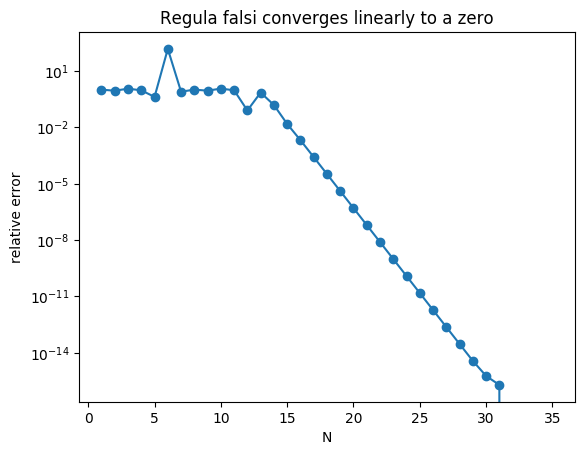

PyObject Text(0.5, 1.0, 'Regula falsi converges linearly to a zero')

In [122]:
f(x) = sin(10x) + x

# convergence analysis
Ns = collect(1:35)

# roughly one digit per iteration
approximations = [regula_falsi(f, -1.0, 1.1; N=N) for N in Ns]

figure()

semilogy(Ns, abs.(approximations .- approximations[end])/approximations[end], "-o")
xlabel("N")
ylabel("relative error")
title("Regula falsi converges linearly to a zero")